In [1]:
import boto3
import botocore
from iterdub import iterdub as ib
from matplotlib import pyplot as plt
import pandas as pd
from pandas.util import hash_pandas_object
import seaborn as sns
from teeplot import teeplot as tp

In [2]:
from dishpylib.pyhelpers import get_env_context
from dishpylib.pyhelpers import get_git_revision_hash
from dishpylib.pyhelpers import make_timestamp
from dishpylib.pyhelpers import print_runtime

In [3]:
print_runtime()

context: ci
hostname: 48db7928633a
interpreter: 3.8.16 (default, Dec  7 2022, 01:12:13)  [GCC 7.5.0]
revision: c94524810
timestamp: 2022-12-17T06:42:32Z00:00

IPython==7.16.1
boto3==1.14.44
botocore==1.17.44
iterdub==0.2.0
matplotlib==3.5.2
pandas==1.1.2
seaborn==0.11.2
teeplot==0.1.1


# get data

In [4]:
s3_handle = boto3.resource(
    's3',
    region_name="us-east-2",
    config=botocore.config.Config(
        signature_version=botocore.UNSIGNED,
    ),
)
bucket_handle = s3_handle.Bucket('prq49')

series_profiles, = bucket_handle.objects.filter(
    Prefix=f'endeavor=16/thread-profiles/stage=8+what=elaborated/',
)

In [5]:
df = pd.read_csv(
    f's3://prq49/{series_profiles.key}',
    compression='xz',
)
dfdigest = '{:x}'.format(hash_pandas_object( df ).sum())
dfdigest

'-5b38a7939674d585'

In [6]:
for stint in df['Stint'].unique():
    exec(f'df{stint} = df[ df["Stint"] == {stint} ]')

# unique phylogenetic roots over evolutionary time

teeplots/bucket=prq49+ci=sd+endeavor=16+hue=series+transform=identity+viz=logx-lineplot+x=stint+y=number-phylogenetic-roots+ext=.pdf
teeplots/bucket=prq49+ci=sd+endeavor=16+hue=series+transform=identity+viz=logx-lineplot+x=stint+y=number-phylogenetic-roots+ext=.png


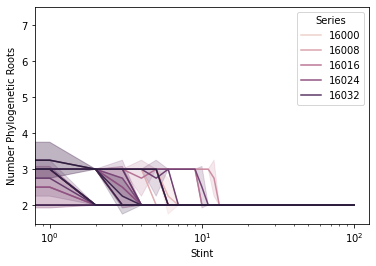

In [7]:
def logx_lineplot(*args, **kwargs):
    sns.lineplot(
        *args,
        **kwargs,
    )
    plt.gca().set_xscale('log')


tp.tee(
    logx_lineplot,
    data=df,
    x='Stint',
    y='Number Phylogenetic Roots',
    hue='Series',
    ci='sd',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

# within-stint phylogenetic roots over evolutionary time

teeplots/viz=lineplot+x=stint+y=number-stint-phylogenetic-roots+ext=.pdf
teeplots/viz=lineplot+x=stint+y=number-stint-phylogenetic-roots+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Number Stint Phylogenetic Roots'>

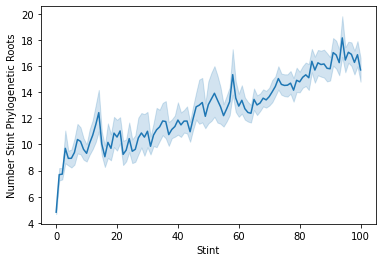

In [8]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Number Stint Phylogenetic Roots',
)

teeplots/bucket=prq49+ci=sd+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=number-stint-phylogenetic-roots+ext=.pdf
teeplots/bucket=prq49+ci=sd+endeavor=16+hue=series+transform=identity+viz=lineplot+x=stint+y=number-stint-phylogenetic-roots+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Number Stint Phylogenetic Roots'>

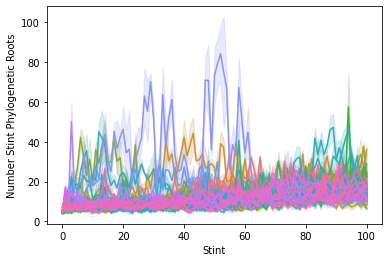

In [9]:
tp.tee(
    sns.lineplot,
    data=df.astype({'Series': 'str'}),
    x='Stint',
    y='Number Stint Phylogenetic Roots',
    hue='Series',
    ci='sd',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

# explanatory factor: updates elapsed per stint

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=scatterplot+x=update+y=number-stint-phylogenetic-roots+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=scatterplot+x=update+y=number-stint-phylogenetic-roots+ext=.png


<AxesSubplot:xlabel='Update', ylabel='Number Stint Phylogenetic Roots'>

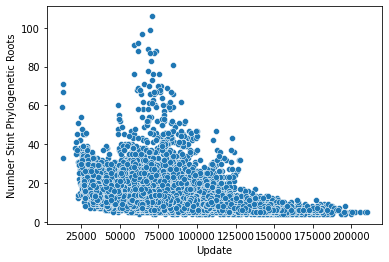

In [10]:
tp.tee(
    sns.scatterplot,
    data=df,
    x='Update',
    y='Number Stint Phylogenetic Roots',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=scatterplot+x=update+y=number-stint-phylogenetic-roots+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=scatterplot+x=update+y=number-stint-phylogenetic-roots+ext=.png


<AxesSubplot:xlabel='Update', ylabel='Number Stint Phylogenetic Roots'>

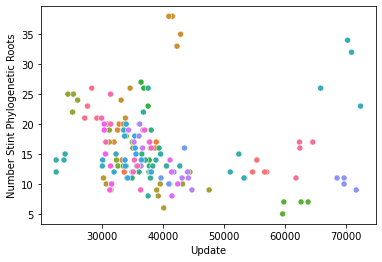

In [11]:
tp.tee(
    sns.scatterplot,
    data=df100.astype({'Series': 'str'}),
    x='Update',
    y='Number Stint Phylogenetic Roots',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

# explanatory factor: elapsed generations 

teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=scatterplot+x=elapsed-generations+y=number-stint-phylogenetic-roots+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=series+transform=identity+viz=scatterplot+x=elapsed-generations+y=number-stint-phylogenetic-roots+ext=.png


<AxesSubplot:xlabel='Elapsed Generations', ylabel='Number Stint Phylogenetic Roots'>

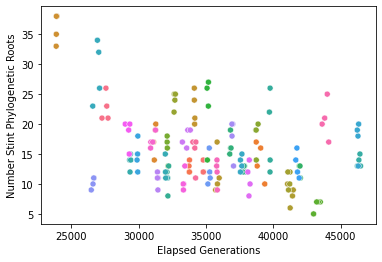

In [12]:
tp.tee(
    sns.scatterplot,
    data=df100.astype({'Series': 'str'}),
    x='Elapsed Generations',
    y='Number Stint Phylogenetic Roots',
    hue='Series',
    legend=False,
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=elapsed-generations-delta+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=elapsed-generations-delta+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Elapsed Generations Delta'>

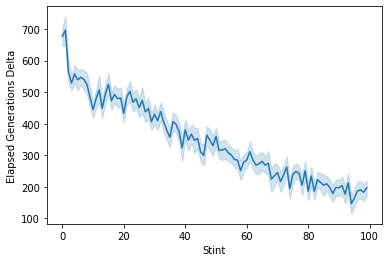

In [13]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Elapsed Generations Delta',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=dual-lineplot+x=stint+y1=elapsed-generations-delta+y2=update+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=dual-lineplot+x=stint+y1=elapsed-generations-delta+y2=update+ext=.png


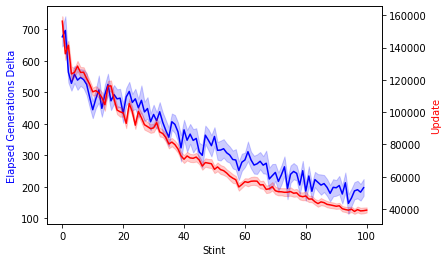

In [14]:
def dual_lineplot(*, data, x, y1, y2):
    
    sns.lineplot(
        data=data,
        x=x,
        y=y1,
        color='blue',
    )
    plt.gca().yaxis.label.set_color('blue')

    
    sns.lineplot(
        data=data,
        x=x,
        y=y2,
        ax=plt.gca().twinx(),
        color='red',
    )
    plt.gca().yaxis.label.set_color('red')


tp.tee(
    dual_lineplot,
    data=df,
    x='Stint',
    y1='Elapsed Generations Delta',
    y2='Update',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=dual-lineplot+x=stint+y1=number-stint-phylogenetic-roots+y2=elapsed-generations-delta+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=dual-lineplot+x=stint+y1=number-stint-phylogenetic-roots+y2=elapsed-generations-delta+ext=.png


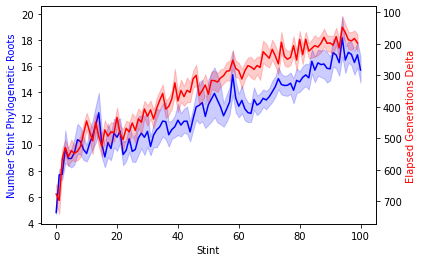

In [15]:
def dual_lineplot(*, y1, y2, **kwargs):
    
    sns.lineplot(
        **kwargs,
        y=y1,
        color='blue',
    )
    plt.gca().yaxis.label.set_color('blue')
    
    sns.lineplot(
        **kwargs,
        y=y2,
        ax=plt.gca().twinx().invert_yaxis(),
        color='red',
    )
    plt.gca().yaxis.label.set_color('red')
    

tp.tee(
    dual_lineplot,
    data=df,
    x='Stint',
    y1='Number Stint Phylogenetic Roots',
    y2='Elapsed Generations Delta',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=generations-per-update+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=generations-per-update+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Generations Per Update'>

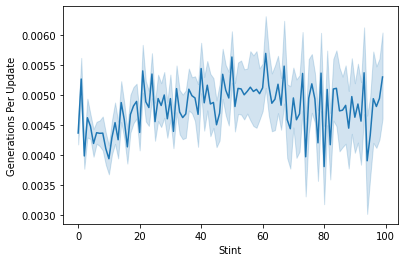

In [16]:
tp.tee(
    sns.lineplot,
    data=df,
    x='Stint',
    y='Generations Per Update',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

# case study: series 16005

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=number-stint-phylogenetic-roots+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=number-stint-phylogenetic-roots+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Number Stint Phylogenetic Roots'>

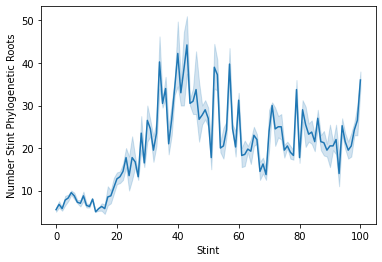

In [17]:
tp.tee(
    sns.lineplot,
    data=df[ df['Series'] == 16005 ],
    x='Stint',
    y='Number Stint Phylogenetic Roots',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+hue=thread+transform=identity+viz=lineplot+x=stint+y=number-stint-phylogenetic-roots+ext=.pdf
teeplots/bucket=prq49+endeavor=16+hue=thread+transform=identity+viz=lineplot+x=stint+y=number-stint-phylogenetic-roots+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Number Stint Phylogenetic Roots'>

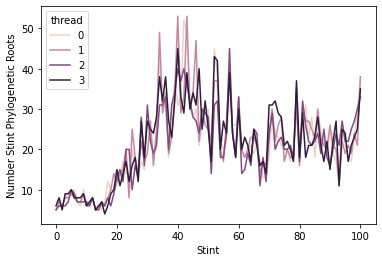

In [18]:
tp.tee(
    sns.lineplot,
    data=df[ df['Series'] == 16005 ],
    x='Stint',
    y='Number Stint Phylogenetic Roots',
    hue='thread',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=logx-lineplot+x=stint+y=number-phylogenetic-roots+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=logx-lineplot+x=stint+y=number-phylogenetic-roots+ext=.png


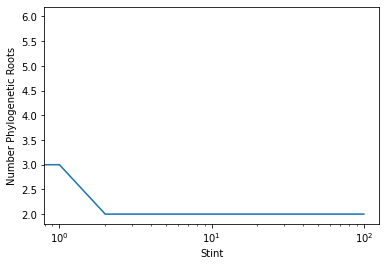

In [19]:
def logx_lineplot(*args, **kwargs):
    sns.lineplot(
        *args,
        **kwargs,
    )
    plt.gca().set_xscale('log')


tp.tee(
    logx_lineplot,
    data=df[ df['Series'] == 16005 ],
    x='Stint',
    y='Number Phylogenetic Roots',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=update+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=update+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Update'>

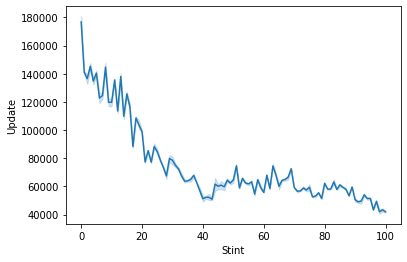

In [20]:
tp.tee(
    sns.lineplot,
    data=df[ df['Series'] == 16005 ],
    x='Stint',
    y='Update',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)

teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=elapsed-generations-delta+ext=.pdf
teeplots/bucket=prq49+endeavor=16+transform=identity+viz=lineplot+x=stint+y=elapsed-generations-delta+ext=.png


<AxesSubplot:xlabel='Stint', ylabel='Elapsed Generations Delta'>

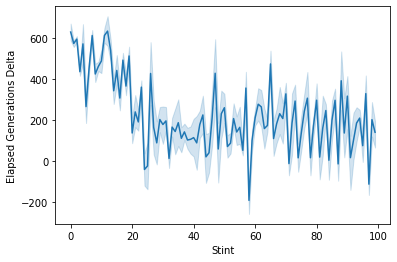

In [21]:
tp.tee(
    sns.lineplot,
    data=df[ df['Series'] == 16005 ],
    x='Stint',
    y='Elapsed Generations Delta',
    teeplot_outattrs={
        'bucket' : ib.dub( df['Bucket'] ),
        'endeavor' : ib.dub( df['Endeavor'].astype(int) ),
        'transform' : 'identity',    
        '_context' : get_env_context(),
        '_dfdigest' : dfdigest,
        '_revision' : get_git_revision_hash(),
        '_timestamp' : make_timestamp(),
    },
)